# Tarea 3- Mapper aplicado

Itzel Yacquelin Beltran Reyes - A00832700

Iván Alejandro Ortíz Valadez - A00834559

David Alejandro Acuña Orozco - A00571187

Valeria Edith Lugo Gutiérrez - A00830523

Para esta tarea se hicieron análisis a 2 bases de datos, la primera en la que se ve como se comporta una muestra de estudiantes ante examenes de 3 áreas diferentes para ver la distribución de estos alumnos. En la segunda se analizan diferentes acciones de empresas para ver como se comportan a través del tiempo y se agrupan según su precio y su retorno (lo que se obtiene por invertir en ellas)

## Base de datos 1

La siguiente base de datos contiene la información de las calificiones de Matemáticas, Redacción y Lectura de algunos estudiantes de Estados Unidos en el 2015, de igual manera contiene información de nivel de estudios de los padres, raza, sexo, alimentación en la escuela. 

La base de datos se puede encontrar en el siguiente [link](https://www.kaggle.com/spscientist/students-performance-in-exams)

Comenzamos importando las liberías que se necesitarán para este análisis y el posterior

In [13]:
import yfinance as yf 
import kmapper as km 
from kmapper.jupyter import display
import umap.umap_ as umap
import sklearn
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans
import palettable


Ahora leemos los datos y aplicamos nuestro mapper, se definen los parámetros de la cobertura y se hace el calculo de la inercia, este calcuro servirá posteriormente para saber cual es el número óptimo (al menos el óptimo local) de clusters para usar Kmeans

In [14]:
# Leer los datos
performance_data = pd.read_csv('StudentsPerformance.csv')

# Seleccionar solo las columnas relevantes para el análisis
data = performance_data[['math score', 'reading score', 'writing score']].values

# Calcular el puntaje promedio de lectura y escritura
mean_outer_score = (data[:, 1] + data[:, 2]) / 2.0

# Inicializar KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Proyección sobre el puntaje de matemáticas (primera columna de datos)
projected_data = mapper.fit_transform(data, projection=[0])

# Definir los parámetros para la cobertura
covering = km.Cover(n_cubes=8, perc_overlap=0.2)

# Calculo la inercia
sse = []
max_clusters = 8
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

Se aplica el método del codo que revisa el margen de error que tiene cada cantidad de clusters para ver cual es el más adecuado, usando la curva del codo en la que el punto de inflexión es el lugar en el que se encuentra el número que buscamos

El codo se encuentra en k=5


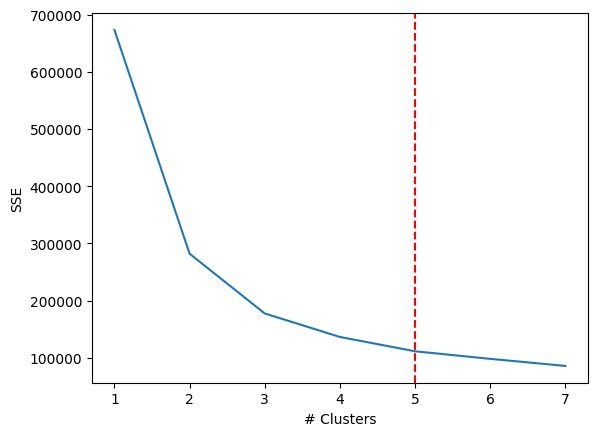

In [15]:
# Encontrar el punto de inflexión en la curva del codo
diff = np.diff(sse)
diff_ratio = diff / sse[:-1]
inflection_idx = np.argmax(diff_ratio) + 1

# Visualizar el codo
print(f'El codo se encuentra en k={inflection_idx}')
plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.axvline(x=inflection_idx, color='r', linestyle='--')
plt.show()


Una vez que tenemos este resultado podemos pasar a hacer el gráfico del maper el cual nos demostrará como se ven los nodos de la base de datos anterior, como esta se distribuye por grupos, además de que se podrá cambiar el color de cada nodo (el como se agrupan, no el como se conectan entre sí) dependiendo del promedio, desviación estandar, suma total, maximo y minimo.
Esto se despliega en un html lo cual es de gran ayuda para manipulación de este y menos memoria al momento de cargar el código (si se presenta algún bug, guardar un archivo vacío con el nombre "mapper_visualization_output.html", al momento de correr este chunk se guardará en ese archivo)

Asimismo se aplica el Kmeans para su posterior visualización

In [16]:
# Crear el grafo utilizando KeplerMapper
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=int(inflection_idx)), cover=covering)

# Visualizar el grafo
mapper.visualize(G, 
                title='Performance Data based on Math Score and Mean of other two',
                color_values=mean_outer_score,
                color_function_name='Mean of Reading and Writing Score',
                node_color_function=np.array(['average', 'std', 'sum', 'max', 'min']))

# Guardar la visualización como archivo HTML
km.jupyter.display("performance_math_score.html")

# Aplicar KMeans clustering en los datos totales
kmeans_total = KMeans(n_clusters=int(inflection_idx), random_state=0).fit(data)
labels_total = kmeans_total.labels_
centroids_total = kmeans_total.cluster_centers_

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 8 hypercubes.


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\


Created 32 edges and 35 nodes in 0:00:00.454515.
Wrote visualization to: mapper_visualization_output.html


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Aquí se grafíca lo obtenido por el Kmeans donde podremos ver donde se ubican los centroides (el centro de cada cluster) y su distribución a través del plano 3d, podríamos hacerlo 2d pero se compararían solo 2 variables a la vez y así podemos visualizarlo todo al mismo tiempo

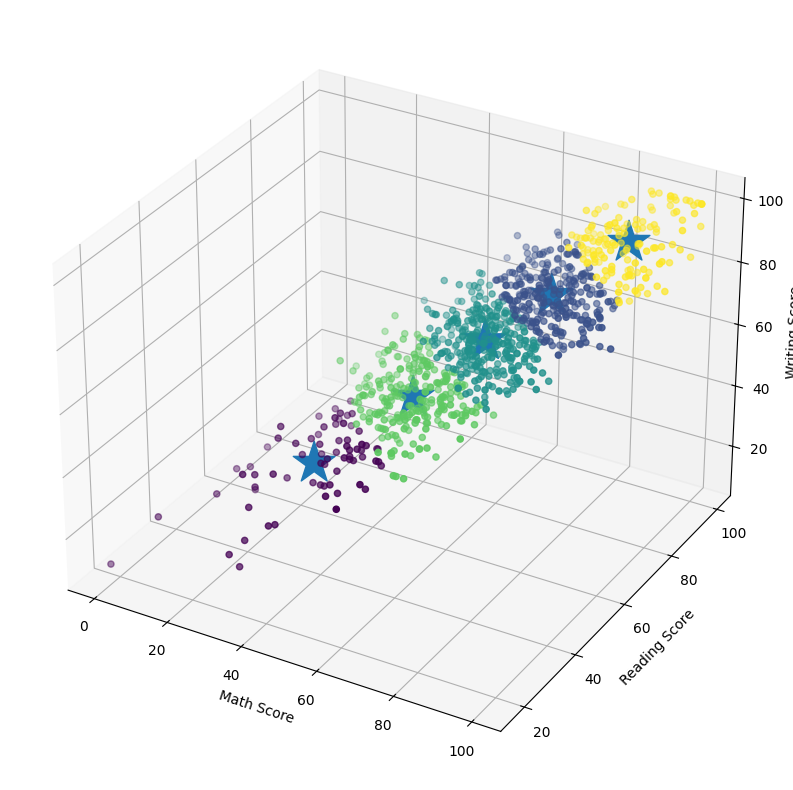

In [17]:
# Crear un scatter plot 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels_total, s=20, cmap='viridis')
ax.scatter(centroids_total[:, 0], centroids_total[:, 1], centroids_total[:, 2], s=1000, alpha=1, marker='*')

# Etiquetar los ejes
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')

# Mostrar el gráfico
plt.show()


Al ver esta gráfica y el mapper podemos ver que la mayor parte de los alumnos tuvieron una calificación promedio que se encuentra por el 60-80 de cada área, en este espacio se encuentran más nodos y más clusters de kmeans

## Base de datos 2

Exploración Nivel 2:

Descargar el SP500_tickernames (1).txt

estudiaremos una base de datos de acciones bursátiles. Cabe mencionar que, la elección de los parámetros de Mapper depende del problema que estemos trabajando, y no hay un óptimo como tal, todo depende de lo que queramos estudiar. Con esta base de datos, queremos estudiar aquellas acciones que se parezcan entre ellas, es decir, que tengan un comportamiento similar en el mercado.

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado. Se trabajará un archivo de ticketmaster.

Antes de trabajar con el archivo se debe preparar:

Leer el archivo

* Definir el rango de fechas

* Obtenga los datos históricos

* Obtenga precios de cierre diarios y elimine las columnas que faltan

* Para aplicar el algoritmo de Mapper de manera adecuada, convierta esta base de datos en una matriz de datos, donde cada fila corresponde a una acción y cada columna corresponde a un día. De igual manera estandarice los datos para que todos tengan la misma escala (esto con el objeto de que nuestros no estén tan dispersos).

La razón de retorno de una inversión es la ganancia o pérdida que se obtiene en una inversión en relación con la cantidad invertida inicialmente. El porcentaje de retorno se calcula dividiendo la ganancia o pérdida neta por el costo original de la inversión. Esta tasa de rendimiento permite a los inversores comparar el éxito de una inversión con otras.
Calcula el porcentaje de retorno (de la inversión) de cada ticket sobre el rango de fechas
Proyectar utilizando funciones nuevas: 

Para este caso particular usaremos una proyección dada por el isomap, que es un algoritmo de reducción de dimensionalidad. Intuitivamente, el isomap encuentra una representación de los datos en un espacio de menor dimensión, donde la distancia entre dos puntos es la distancia geodésica (distancia que minimiza la energía) a lo largo de los puntos más cercanos en los datos originales.

Notemos que a nuestra proyección le pedimos n_components=500, lo cual indica que la cubierta en la imágen tendrá 500 abiertas. Dependiente la cantidad de componentes que pidamos, nuestro gráfo cambia de complejidad (más componentes, más nodos y aristas, o menos, o inexistencia).

El UMAP sirve para dar cierta categorización a los datos cuando no son claras las categorías, el UMAP es un algoritmo avanzado que necesita de muchos requerimientos y que no son parte del curso, pero que es importante mencionar para este ejemplo. No nos centraremos mucho en lo que hace UMAP, pero quedense con la idea de la categorización.

Proyecta los datos a dos dimensiones usando dos transformaciones:
 * Coordenada 1 isomap https://en.wikipedia.org/wiki/Isomap Links to an external site. 
 * Coordenada 2 UMAP https://arxiv.org/abs/1802.03426 Links to an external site. 

Una vez obtenida la proyección y el número de abiertos en la cubierta de la imágen. Procede a pedir a mapper que en nuestra proyección, nos haga un clustering de los datos y nos cree el gráfo. Para ello, usa la función mapper.map().

En este caso usamos la proyección descrita anteriormente, y como clusterer usaremos DBSCAN con la métrica del coseno. La métrica del coseno nos indica que tan parecidos son dos vectores o dos pendientes. Como queremos conocer el comportamiento de las acciones (sus ascensos y descensos) esta métrica es ideal.

Una vez que ya apliques el algoritmo a nuestros datos, vamos a visualizarlos. Para ello, usa la función mapper.visualize()

En teoría, si todo salió bien, cada componente conexa del gráfo debería contener información de comportamiento similar en los elementos del nodo.



Como ya cargamos la librerías anteriormente comenzamos leyendo los datos

In [18]:
# Cargar los nombres de los tickers desde el archivo
with open('SP500_tickernames.txt', 'r') as f:
    ticker_names = f.read().splitlines()

# Descargar los datos de los precios de las acciones
start_date_string = "2020-01-01"
end_date_string = "2022-04-02"
raw_data = yf.download(ticker_names, start=start_date_string, end=end_date_string)


[*********************100%%**********************]  495 of 495 completed

26 Failed downloads:
['DISH', 'XLNX', 'ABC', 'DISCA', 'DISCK', 'ANTM', 'DRE', 'INFO', 'VIAC', 'CDAY', 'BLL', 'ATVI', 'FRC', 'NLOK', 'PKI', 'NLSN', 'TWTR', 'FBHS', 'PBCT', 'FB', 'RE', 'CTXS', 'CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
['PEAK']: Exception('%ticker%: No data found, symbol may be delisted')
['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['FISV']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1648872000")


Los estandarizamos para que el código pueda comprenderlos

In [19]:
from sklearn.preprocessing import StandardScaler
# Eliminar NaN columns y normalizar los datos
df_close = raw_data["Adj Close"].dropna(axis="columns")
data_normalized = StandardScaler().fit_transform(df_close)

# Calcular el retorno porcentual
returns = (df_close.iloc[-1] - df_close.iloc[0]) / df_close.iloc[0]

In [20]:
returns

Ticker
A       0.579841
AAL    -0.370663
AAP     0.341785
AAPL    1.358909
ABBV    1.030015
          ...   
YUM     0.210806
ZBH    -0.103706
ZBRA    0.596550
ZION    0.311687
ZTS     0.443077
Length: 469, dtype: float64

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (568, 2)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()



c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

El codo se encuentra en k=5


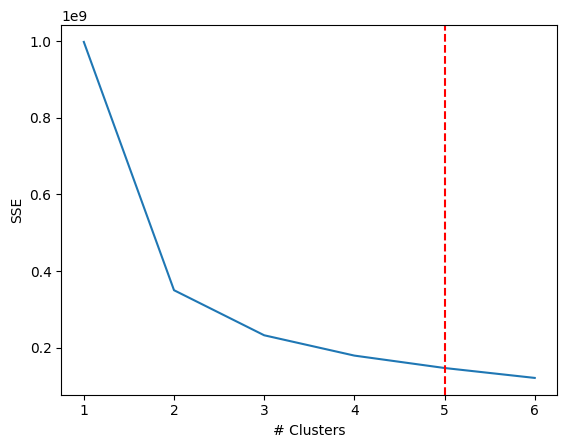

In [21]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
datos_proyectados_pca = pca.fit_transform(df_close)

# Aplicar KeplerMapper
mapper = km.KeplerMapper(verbose=2)
projected_data = mapper.fit_transform(datos_proyectados_pca, projection=[1])

# Encontrar el punto de inflexión para determinar el número óptimo de clusters
sse = []
max_clusters = 7
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_close)
    sse.append(kmeans.inertia_)

diff = np.diff(sse)
diff_ratio = diff / sse[:-1]
inflection_idx = np.argmax(diff_ratio) + 1

print(f'El codo se encuentra en k={inflection_idx}')
plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("# Clusters")
plt.ylabel("SSE")
plt.axvline(x=inflection_idx, color='r', linestyle='--')
plt.show()



In [22]:
# Realizar el mapeo
G = mapper.map(projected_data, df_close, clusterer=KMeans(n_clusters=int(inflection_idx)))

# Visualizar el grafo
mapper.visualize(G, title='Relación entre retornos', color_values=mean_outer_score, color_function_name='Media datos proyectados', node_color_function=np.array(['average', 'std', 'min']))

# Guardar el HTML con el nombre deseado
km.jupyter.display("proyectados.html")


Mapping on data shaped (568, 469) using lens shaped (568, 1)

Minimal points in hypercube before clustering: 5
Creating 10 hypercubes.
   > Found 5 clusters in hypercube 0.
   > Found 5 clusters in hypercube 1.


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   > Found 5 clusters in hypercube 2.
   > Found 5 clusters in hypercube 3.
   > Found 5 clusters in hypercube 4.


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   > Found 5 clusters in hypercube 5.
   > Found 5 clusters in hypercube 6.
   > Found 5 clusters in hypercube 7.
   > Found 5 clusters in hypercube 8.

c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



   > Found 5 clusters in hypercube 9.

Created 26 edges and 50 nodes in 0:00:00.682974.
Wrote visualization to: mapper_visualization_output.html


c:\Users\ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [23]:
# Obtener el grafo con un único cluster por cubo
nuevo_grafo = []
for i in range(16):
    nodo = f'cube{i}_cluster0'
    nuevo_grafo = nuevo_grafo + [G['nodes'][nodo]]

In [25]:
# Definir función para graficar
def graficar_scatter(x, grafo, title):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_prop_cycle('color', palettable.colorbrewer.qualitative.Dark2_8.mpl_colors)
    for i in grafo.columns:
        y = grafo[i].to_numpy()
        ax.plot(x, y)
    ax.legend(grafo.columns, loc="upper left")
    ax.set_title(title, fontsize=24)
    plt.show()

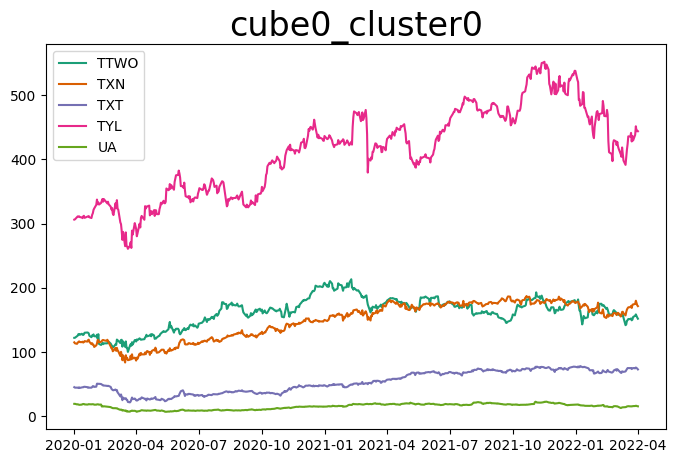

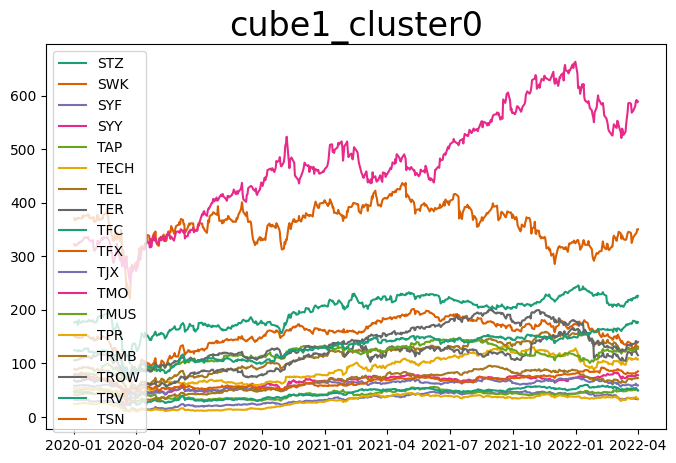

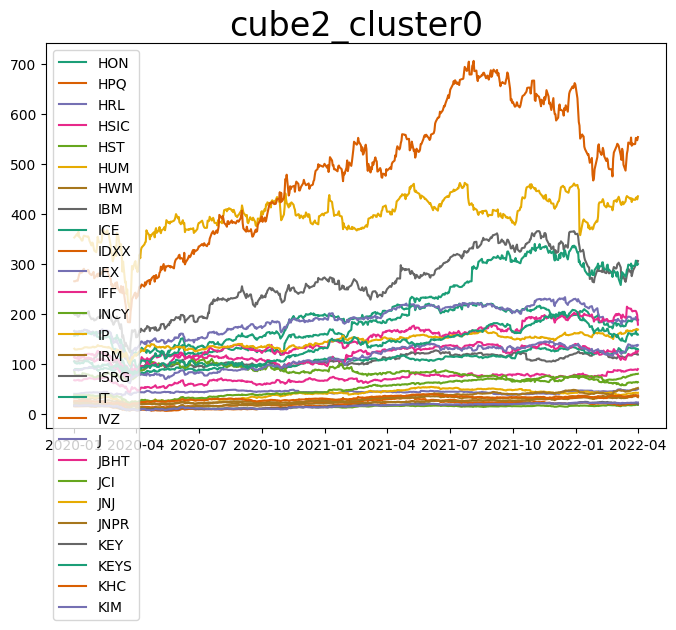

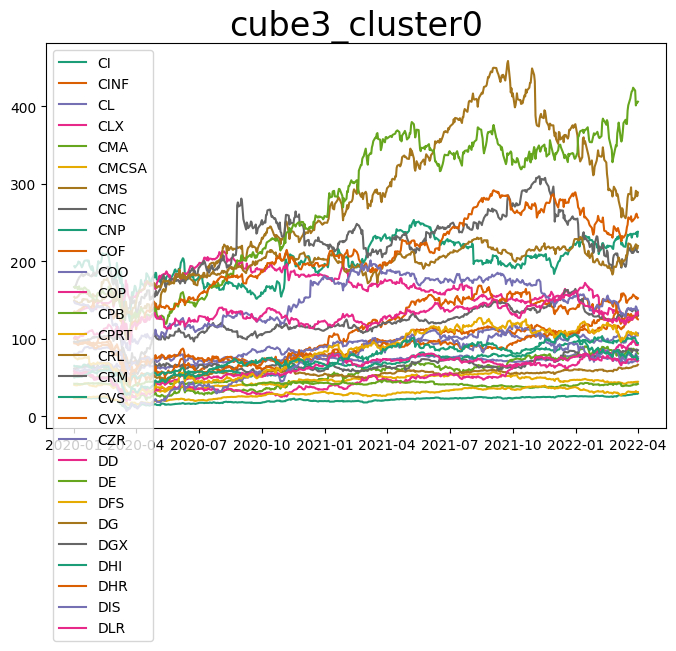

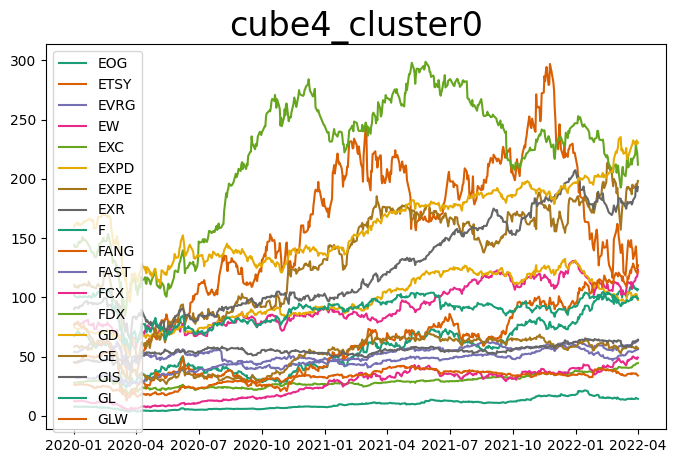

El cluster del cubo 5 está vacío y no se trazará.
El cluster del cubo 6 está vacío y no se trazará.
El cluster del cubo 7 está vacío y no se trazará.


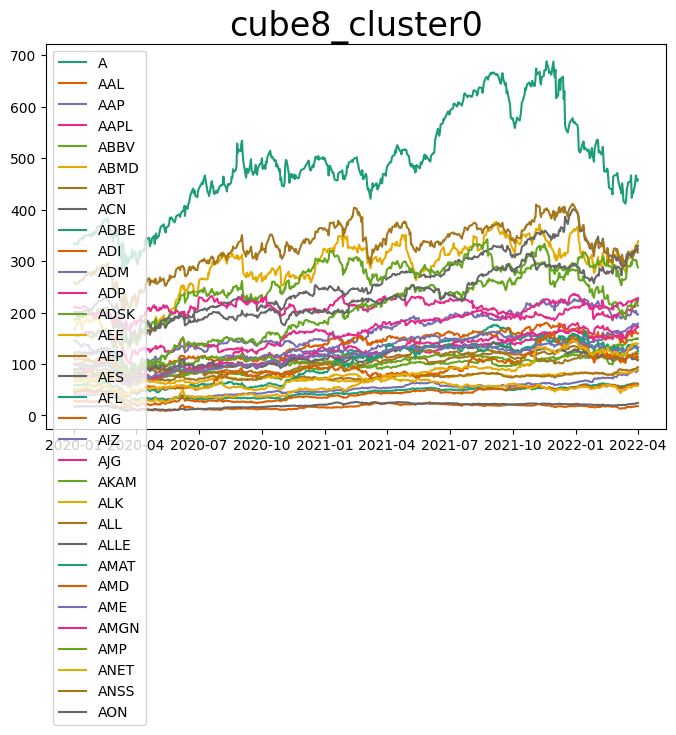

El cluster del cubo 9 está vacío y no se trazará.
El cluster del cubo 10 está vacío y no se trazará.
El cluster del cubo 11 está vacío y no se trazará.
El cluster del cubo 12 está vacío y no se trazará.
El cluster del cubo 13 está vacío y no se trazará.
El cluster del cubo 14 está vacío y no se trazará.
El cluster del cubo 15 está vacío y no se trazará.


In [29]:
import matplotlib.pyplot as plt
import palettable
# Graficar todos los clusters de cada cubo
for i, cluster in enumerate(nuevo_grafo):
    # Filtrar los índices en cluster que están dentro de los límites del DataFrame
    valid_indices = [idx for idx in cluster if idx < len(df_close.columns)]
    # Verificar si el cluster no está vacío
    if valid_indices:
        cluster_df = df_close.iloc[:, valid_indices]
        x = np.array(df_close.index)
        graficar_scatter(x, cluster_df, f'cube{i}_cluster0')
    else:
        print(f"El cluster del cubo {i} está vacío y no se trazará.")

